In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def line_creator(a, b):
    return lambda x: a*x + b
    


In [6]:
linea_nueva = line_creator(1, 0)
linea_nueva(6)

6

In [7]:
linea_nueva(0)

0

In [8]:
def fm1(f):
    return f(4) +1


In [9]:
fm1(linea_nueva)

5

In [10]:
df = pd.read_csv('methanol-water.csv')
df

,x,y
0,0.02,0.013
1,0.06,0.300
2,0.10,0.420
3,0.20,0.570
4,0.30,0.660
5,0.40,0.720
6,0.50,0.780
7,0.60,0.820
8,0.70,0.870
9,0.80,0.910


In [11]:
x = df['x'].values
y = df['y'].values

In [12]:
y

array([0.013, 0.3  , 0.42 , 0.57 , 0.66 , 0.72 , 0.78 , 0.82 , 0.87 ,
       0.91 , 0.95 , 0.98 ])

In [13]:
def create_feed_line(q, xf):
    return lambda x: q*x/(q-1) - xf/(q-1)

In [14]:
feed = create_feed_line(0.5, 0.5)
x0f = np.linspace(0,1,200)
y0f = [feed(x) for x in np.linspace(0,1,200)]

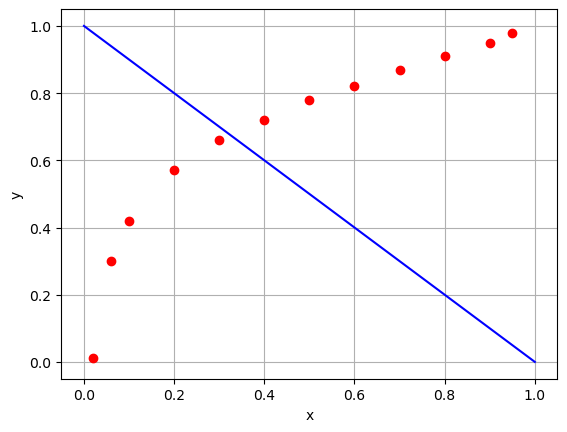

In [15]:
plt.plot(x, y, 'ro')
plt.plot(x0f, y0f, 'b')
plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)

In [23]:
# feed = create_feed_line(0.5, 0.5)
# x
# y
eq_x = x
eq_y = y

In [38]:
class Point:
    def __init__(self, idx, x, y):
        self.idx = idx
        self.x = x[idx]
        self.y = y[idx]
        self.x_data = x
        self.y_data = y

    def change(self, idx):
        self.x = self.x_data[idx]
        self.y = x_data.y_data[idx]

In [53]:
a = Point(0, eq_x, eq_y)
b = Point(len(eq_x)-1, eq_x, eq_y)

fay = feed(a.x)
fby = feed(b.x)
print(a.y, b.y)
print(fay, fby)

0.013 0.98
0.98 0.050000000000000044


In [57]:
def intersection(a, b, feed, eq_x , eq_y ):
    print(a.x, b.x)
    # if a.idx + 1 == b.idx:
    #     return a, b
    
    # n = len(eq_x[a.idx:b.idx])
    m = (a.idx+b.idx)//2
    print(m)
    fay = feed(a.x)
    fby = feed(b.x)
    
    pm = Point(m, eq_x , eq_y)
    
    fmy = feed(pm.x)
    
    if (a.y-fay)*(pm.y-fmy) < 0:
        b = pm
    else:
        a = pm

    return a, b

aa, bb = intersection(a, b, feed, eq_x , eq_x )
aaa, bbb = intersection(aa, bb, feed, eq_x , eq_x )
a3, b3 = intersection(aaa, bbb, feed, eq_x , eq_x )

# print(aa.x, bb.x)
# print(aaa.x, bbb.x)
        
    
    

0.02 0.95
5
0.4 0.95
8
0.4 0.7
6


In [30]:
def factorial(n):
    if n < 2:
        return n
    return factorial(n-1) * n

factorial(5)

120